# Task 2

Perform hyper-parameter tuning on the DecisionTree algorithm in order to predict the target column "smoking". Use 5-fold cross-validation for the hyper-parameter tuning, tune the parameters "criterion", "max_depth", and "min_samples_split". Provide at least 3 values for each parameter.

## Dataset description

### Features

* id - patient identifier
* age - patient age
* height(cm) - patient height in cm
* weight(kg) - patient weight in kg
* waist(cm) - patient waist diameter in cm
* eyesight(left) - patient eyesight left eye
* eyesight(right) - patient eyesight right eye
* hearing(left) - patient hearing condition left ear
* hearing(right) - patient hearing condition right ear
* systolic - patient systolic blood pressure
* relaxation - patient relaxation blood pressure
* fasting blood sugar - patient blood sugar level
* Cholesterol - patient cholesterol level
* triglyceride - patient triglyceride level
* HDL - patient high-density lipoprotein cholesterol level
* LDL - patient low-density lipoprotein cholesterol level
* hemoglobin - patient hemoglobin level
* Urine protein - patinet protein in urine level
* serum creatinine - patient serum creatinine level
* AST - patient aspartate aminotransferase level
* ALT - patient Alanine transaminase level
* Gtp - patient Guanosine-5'-triphosphate level
* dental caries - patient dental status



### Target variable
smoking

In [17]:
import pandas as pd
import missingno as msno
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_predict, KFold
from sklearn.metrics import f1_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.preprocessing import LabelEncoder

### Read the dataset

In [3]:
data = pd.read_csv('smoking.csv')
df = data.copy()

In [4]:
df.sample(5)

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
45844,6230,F,45,155,70,99.1,1.0,1.0,1.0,1.0,...,14.0,1.0,0.8,21.0,18.0,24.0,Y,0,Y,0
34623,43266,M,60,175,60,76.0,0.5,0.6,1.0,1.0,...,14.1,2.0,0.9,26.0,27.0,11.0,Y,1,N,0
43470,54334,M,30,175,75,77.0,1.5,1.2,1.0,1.0,...,17.4,1.0,1.2,25.0,30.0,19.0,Y,0,N,0
38683,48336,M,60,160,65,92.0,0.5,0.4,1.0,1.0,...,14.6,1.0,0.9,50.0,35.0,261.0,Y,0,N,0
50216,28476,F,40,155,50,73.0,0.8,0.9,2.0,1.0,...,12.7,1.0,0.5,23.0,14.0,13.0,Y,1,N,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [6]:
df = df.drop(columns='ID')

<Axes: >

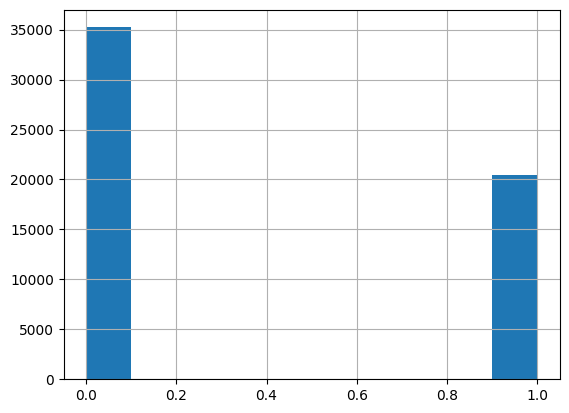

In [7]:
df.smoking.hist()

In [9]:
encoder = LabelEncoder()
df['gender'] = encoder.fit_transform(df['gender'])

In [10]:
encoder = LabelEncoder()
df['oral'] = encoder.fit_transform(df['oral'])

In [11]:
encoder = LabelEncoder()
df['tartar'] = encoder.fit_transform(df['tartar'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  int64  
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

In [14]:
X = df.drop(columns=['smoking'])
Y = df['smoking']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
model = DecisionTreeClassifier()

In [16]:
param_grid = {
    "criterion": ['gini', 'entropy', 'log_loss'],
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 5, 10]
}

In [18]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, Y_train)

D:\anaconda\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [19]:
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

In [21]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      7109
           1       0.66      0.72      0.69      4030

    accuracy                           0.76     11139
   macro avg       0.74      0.75      0.75     11139
weighted avg       0.77      0.76      0.76     11139



In [22]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 2}

In [23]:
print(confusion_matrix(Y_test, Y_pred))

[[5593 1516]
 [1135 2895]]
